
# <center> DATA MINING LABORATORY ASSIGNMENT - 1  <br />
### Name : DIPIKA GURTU
### Roll No : 2018IMT-029
### Aim : To create a decision tree that takes a labeled dataset as input and produce a decision tree. The following dataset in a ratio of 70:30 for training and data. <br />
Dataset: https://archive.ics.uci.edu/ml/datasets/HCV+data

## Importing Required Libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Function to Print Confusion Matrix

In [12]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

## Decision Tree Class and Predictors

Reading Dataframe Done...
  * Number of Null Values in Each Columns are: 
     -> Number of Null values in Category is 0
     -> Number of Null values in Age is 0
     -> Number of Null values in Sex is 0
     -> Number of Null values in ALB is 1
     -> Number of Null values in ALP is 18
     -> Number of Null values in ALT is 1
     -> Number of Null values in AST is 0
     -> Number of Null values in BIL is 0
     -> Number of Null values in CHE is 0
     -> Number of Null values in CHOL is 10
     -> Number of Null values in CREA is 0
     -> Number of Null values in GGT is 0
     -> Number of Null values in PROT is 1
  * Shape of Dataset is 615 Rows by 13 Columns
Handling Categories...
Handling Missing Values...
Fitting Tree Classifier...

Shape of Training Datasets (430, 12)

     -> Precision Score of Decision Tree Algorithm is  77.92

     -> Recall Score of Decision Tree Algorithm is  93.51

     -> Accuracy of Decision Tree Algorithm is  93.51




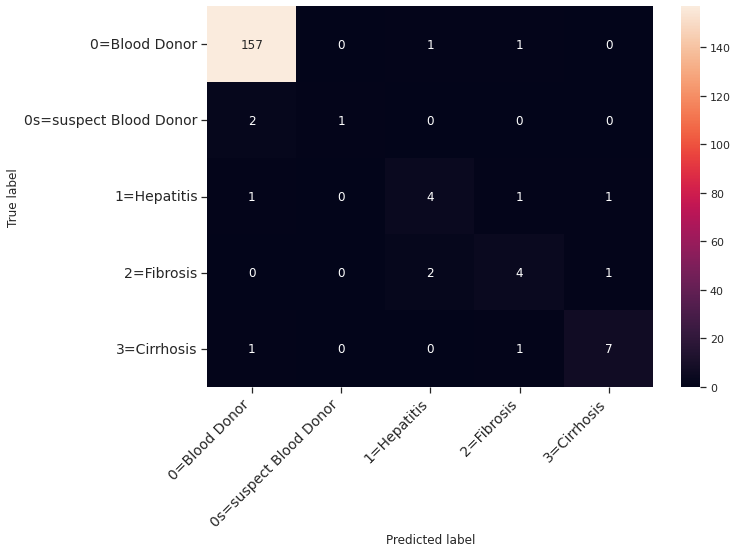

In [13]:

class HCV_Dataset:
    def __init__(self):
        self.data = pd.read_csv('/home/dipikagurtu/Downloads/DM-Ass-1/hcvdat0.csv')
        self.y_cols = self.data.Category.unique()
        print('Reading Dataframe Done...')
    
    def start_preprocessing(self, details = True, category = True, missing = True, scale= True, predict = True):
        if details:self.show_details()
        if category:self.handle_categories()
        print('Handling Categories...')
        if missing:self.handle_missing()
        print('Handling Missing Values...')
        if scale:self.handle_scaler()
        print('Fitting Tree Classifier...')
        if predict:self.predictor()
    
    def visualize_data(self):
        sns.set(style="ticks", color_codes=True)
#         sns.pairplot(self.data[['ALB', 'ALP', 'ALT', 'AST']],hue="Category", diag_kind="kde")
        sns.pairplot(self.data[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE','CHOL', 'CREA', 'GGT', 'PROT','Category' ]],hue="Category", diag_kind="kde")
    
    def show_details(self):
#         display(self.data.sample(5))
        print('  * Number of Null Values in Each Columns are: ')
        for col in self.data.columns:
            print('     -> Number of Null values in {} is {}'.format(col, self.data[col].isnull().sum()))
        print('  * Shape of Dataset is {} Rows by {} Columns'.format(self.data.shape[0] , self.data.shape[1]))
    
    def handle_categories(self, cat = 'Label'):
        if cat =='Label':
            colums = self.data.select_dtypes(include=[object]).columns
            for col in colums:
                self.data[col] = LabelEncoder().fit_transform(self.data[col])
    
    def handle_missing(self, category_to_use = 'Category'):
        # Using Category Mean to fill NAN Values
        colums = [col for col in self.data.columns if self.data[col].isnull().sum()>0]
        for col in colums:
            self.data[col] = self.data[col].fillna(self.data.groupby(category_to_use)[col].transform('mean'))
            
    def handle_scaler(self):
        colums = self.data.select_dtypes(include=[np.float64]).columns         
        self.data[colums] = RobustScaler().fit_transform(self.data[colums])
            
    def handle_drop(self, drop_list):
        self.data.drop(columns = drop_list, inplace = True)
        
    def predictor(self, algo = 'DecisionTree', y_axis = 'Category'):
        self.y_data = self.data[y_axis]
        self.algo = algo
        
        X_train, X_test, y_train, y_test = train_test_split(self.data.drop(columns = [y_axis]) , self.y_data, random_state = 98, test_size = .3) 
        print('\nShape of Training Datasets {}'.format(X_train.shape))
        if self.algo == 'DecisionTree':
            self.algorithm = DecisionTreeClassifier()
            self.algorithm.fit(X_train, y_train)
#             print(self.algorithm.n_classes_)
            print('\n     -> Precision Score of Decision Tree Algorithm is ',round(precision_score(y_test, self.algorithm.predict(X_test) , average = 'macro')*100,2))
            print('\n     -> Recall Score of Decision Tree Algorithm is ',round(recall_score(y_test, self.algorithm.predict(X_test),average = 'micro')*100,2))
            print('\n     -> Accuracy of Decision Tree Algorithm is ',round(self.algorithm.score(X_test,y_test)*100,2))
            cm = confusion_matrix(y_test, self.algorithm.predict(X_test))
            print('\n')
            print_confusion_matrix(cm , self.y_cols)
            
hcv = HCV_Dataset()
hcv.handle_drop(drop_list = ['Unnamed: 0'])
hcv.start_preprocessing()

## To Visualize the Data

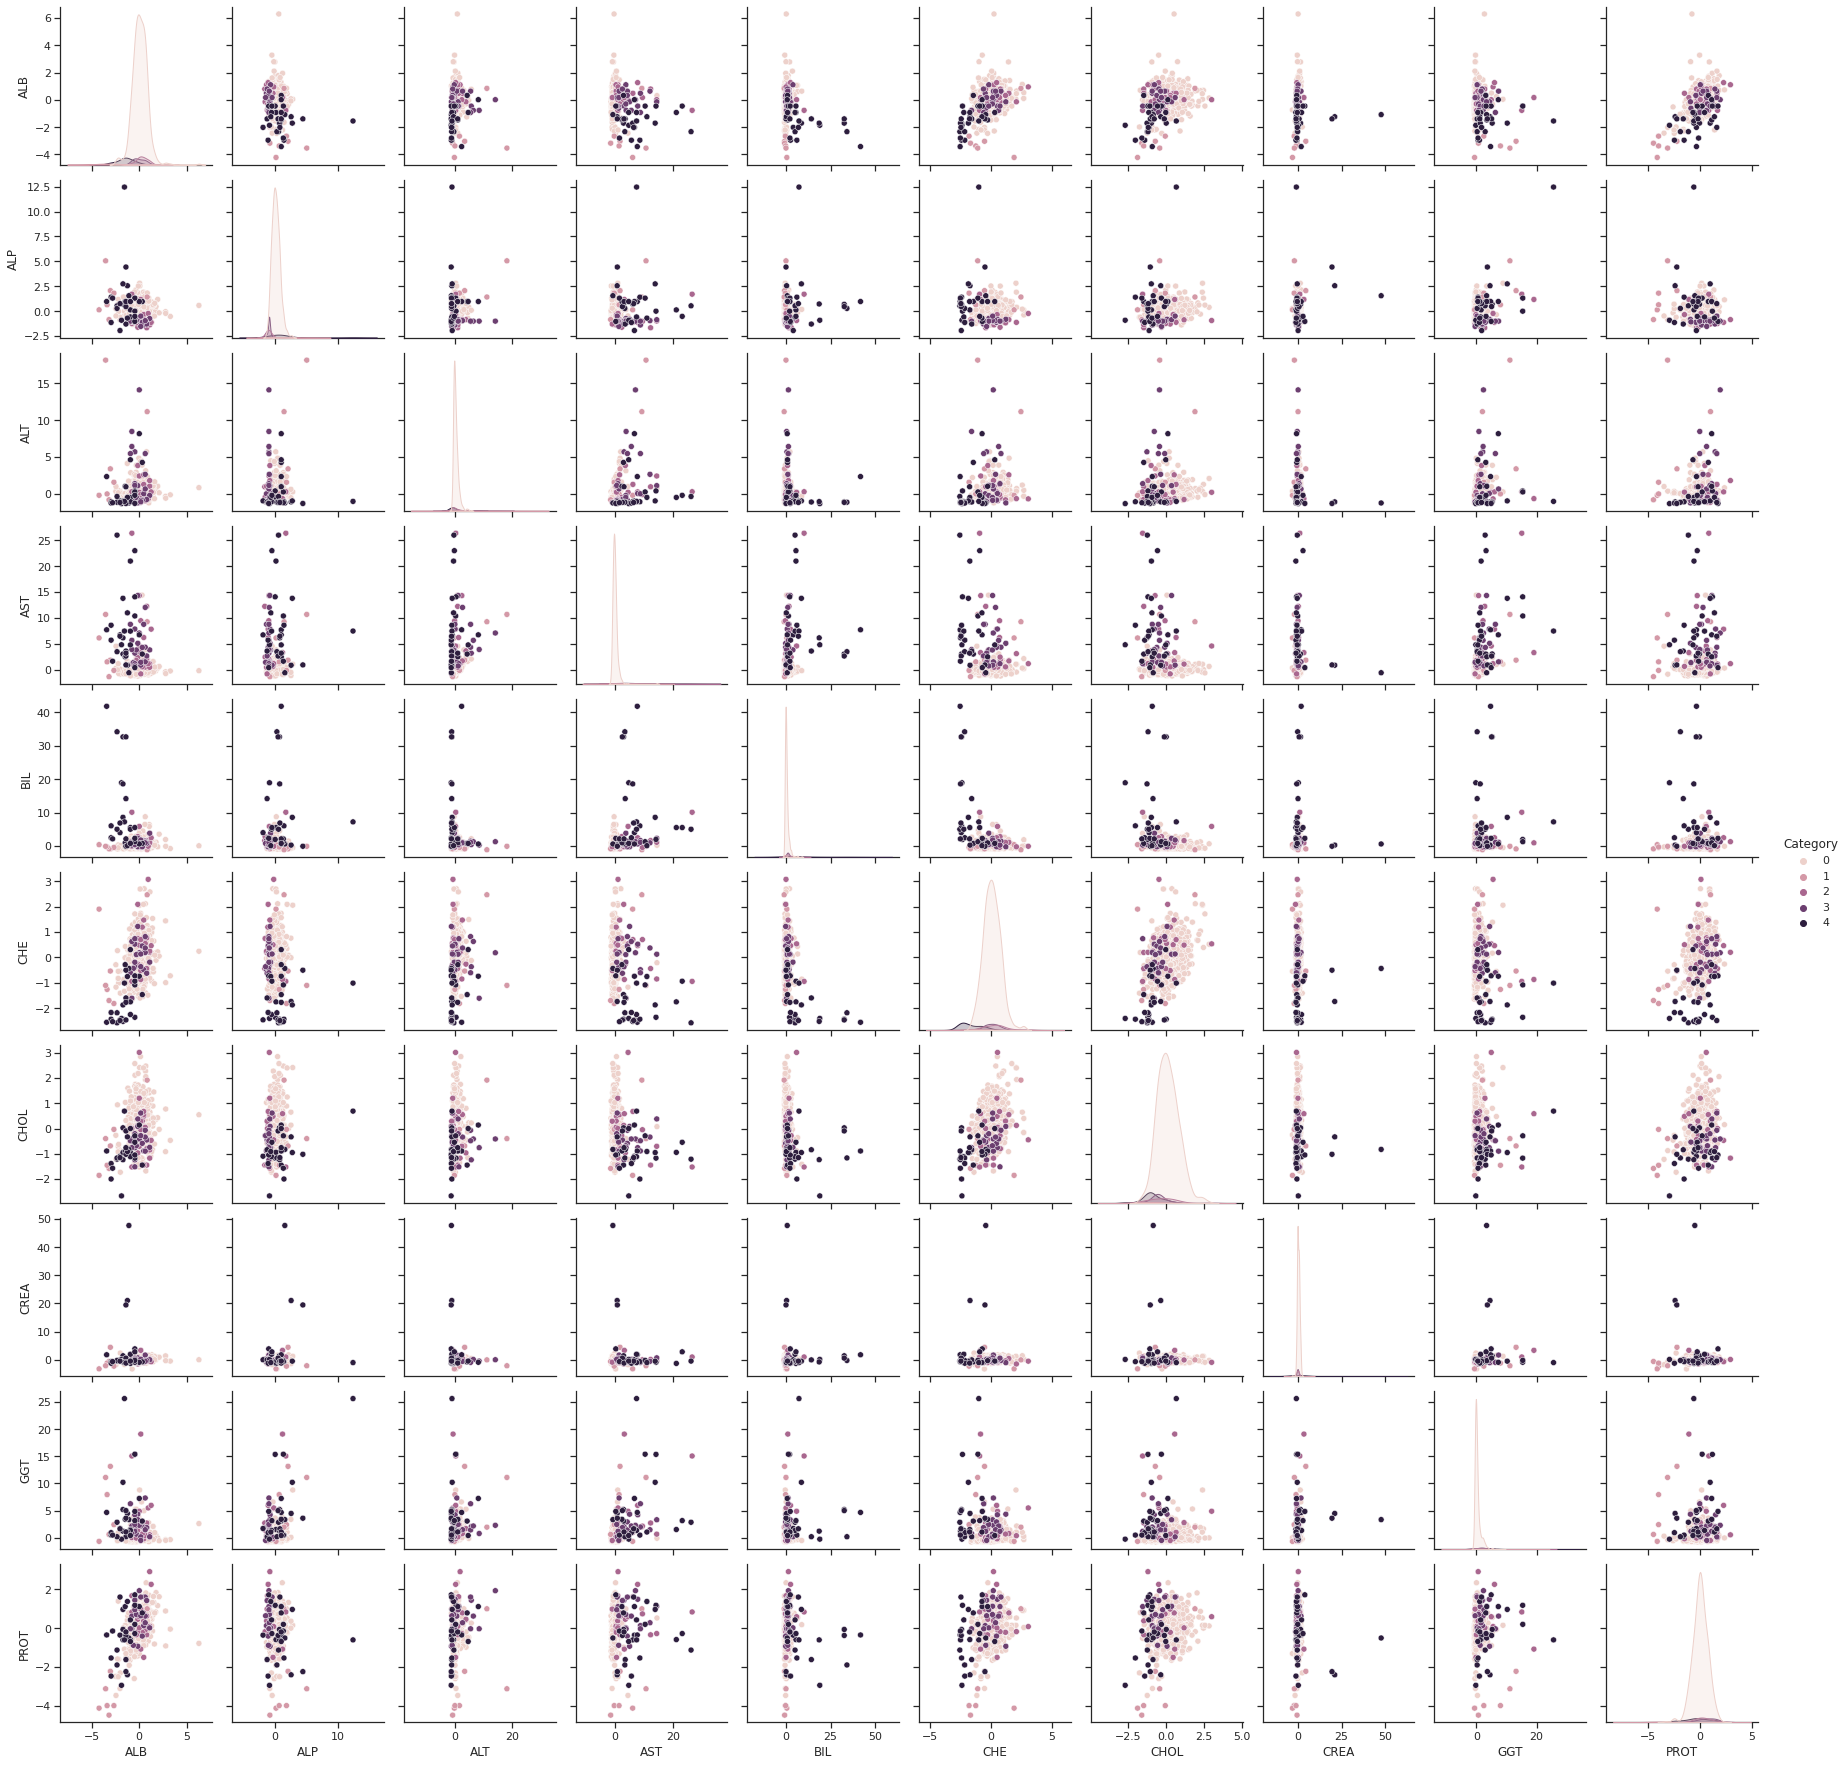

In [14]:
hcv.visualize_data()

In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## To Visualize the Decision Tree

In [21]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(hcv.algorithm, out_file=None, 
                                feature_names=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],  
                                class_names=hcv.y_cols,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH